# Exploración de archivos

In [1]:
from utils.cargar import df_caso

In [2]:
caso = 'adela'
df = df_caso(caso)
df.head()

,user_id,team_id,gender,df,title,opt_left,opt_right,max_num,sel,comment,phase,time
id,,,,,,,,,,,,
20277,4014,NaN,F,1,hola,adios,hola,6,4,hola,1,2021-10-25T23:47:13.685Z
20278,4017,NaN,M,1,hola,adios,hola,6,6,No,1,2021-10-25T23:47:13.842Z
20279,4014,NaN,F,2,Tangananica Tanganana?,Tangananica,Tangaaná,7,1,hola,1,2021-10-25T23:47:15.103Z
20280,4017,NaN,M,2,Tangananica Tanganana?,Tangananica,Tangaaná,7,1,Si,1,2021-10-25T23:47:15.177Z
20281,4016,NaN,M,1,hola,adios,hola,6,6,NaN,1,2021-10-25T23:47:33.868Z


In [3]:
print(df['title'].unique()[-1])
print('1\t'+df['opt_left'].unique()[-1])
print(str(df['max_num'].unique()[-1])+'\t'+df['opt_right'].unique()[-1])

P6 - Tiempo: 5 min. [De acuerdo con la discusión anterior, responda su postura personal sobre el diferencial, recuerde proporcionar argumentos para justificar su respuesta] Considerando la futura población beneficiada por este nuevo alimento y los efectos generados a las tradiciones identitarias del pueblo originario del caso, Adela debería priorizar… :
1	Producir el alimento contra déficit vitamínico
7	Resguardar las tradiciones identitarias


In [4]:
print('Cantidad de valores nulos por columna:')
display(df.isna().sum())
print('\nCantidad de valores únicos por columna:')
display(df.nunique())

Cantidad de valores nulos por columna:


user_id        0
team_id      904
gender         0
df             0
title          0
opt_left       0
opt_right      0
max_num        0
sel            0
comment       79
phase          0
time           0
dtype: int64


Cantidad de valores únicos por columna:


user_id       237
team_id       142
gender          3
df              2
title          32
opt_left        5
opt_right       4
max_num         2
sel             7
comment      1188
phase           7
time         1331
dtype: int64

In [5]:
df = df[df['comment'].notna()]
print("Cantidad de respuestas con texto: {}".format(len(df)))

Cantidad de respuestas con texto: 1252


## Exploración básica del texto

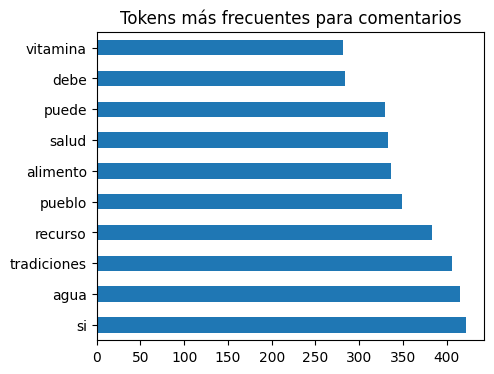

In [6]:
from utils.exploracion import plot_token_frequency, most_common
from nltk.corpus import stopwords

serie_tokens = most_common(df,'comment',ignore=stopwords.words('spanish'))
plot_token_frequency(serie_tokens,'Tokens más frecuentes para comentarios')

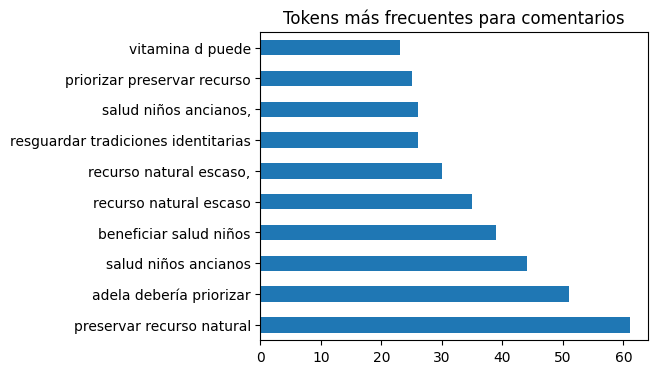

In [7]:
serie_tokens3 = most_common(df,'comment',ignore=stopwords.words('spanish'),n_grams=3)
plot_token_frequency(serie_tokens3,'Tokens más frecuentes para comentarios')

---

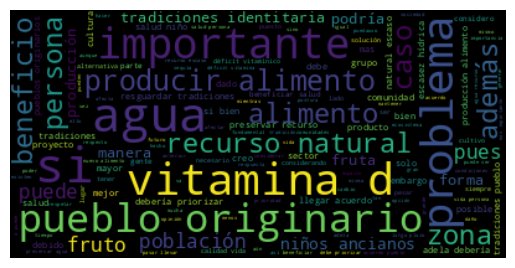

In [8]:
from utils.exploracion import wordcloud_from_column

wordcloud_from_column(df,'comment',ignore=stopwords.words('spanish'))

## Análisis exploratorio

---

In [9]:
from utils.preprocesamiento import delete_non_string_rows

df = delete_non_string_rows(df,'comment')

0 rows found with non string elements for column comment


In [10]:
from utils.exploracion import comment_length

lengths = comment_length(df,'comment')
lengths_nsw = comment_length(df,'comment',ignore=stopwords.words('spanish'))

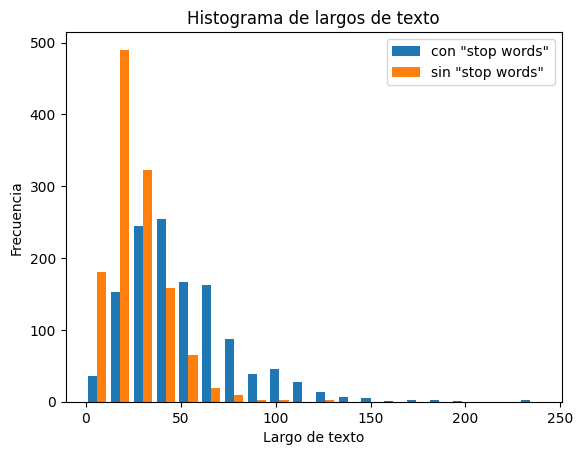

In [11]:
import matplotlib.pyplot as plt

plt.hist([lengths, lengths_nsw], bins=20, color=['tab:blue', 'tab:orange'], label=['con "stop words"', 'sin "stop words"'])

plt.xlabel('Largo de texto')
plt.ylabel('Frecuencia')
plt.title('Histograma de largos de texto')
plt.legend()
plt.show()

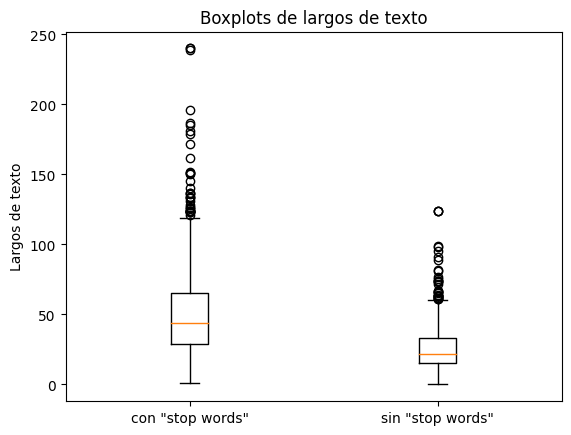

In [12]:
fig, ax = plt.subplots()
ax.boxplot([lengths, lengths_nsw])
ax.set_ylabel('Largos de texto')
ax.set_xticklabels(['con "stop words"', 'sin "stop words"'])
ax.set_title('Boxplots de largos de texto')
plt.show()

In [13]:
from utils.exploracion import basic_stats, print_basic_stats

In [14]:
print('Con "stop words"')
print_basic_stats(lengths)
print('\nSin "stop words"')
print_basic_stats(lengths_nsw)

Con "stop words"
Media: 50.58386581469649
Desviación estándar: 30.290845131714235
Mediana: 44.0
Mínimo: 1
Máximo: 240

Sin "stop words"
Media: 25.50399361022364
Desviación estándar: 15.171621504211467
Mediana: 22.0
Mínimo: 0
Máximo: 124


---

Condicionamiento por valor seleccionado

In [15]:
df['sel'].value_counts()

2    512
3    233
1    184
4    174
5    104
6     44
7      1
Name: sel, dtype: int64

Se observan valores fuera de rango, por el momento se eliminarán estos valores

In [16]:
df = df.drop(df[df['sel'] > 6].index)

In [17]:
toks_1 = most_common(df[df['sel'] == 1],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_2 = most_common(df[df['sel'] == 2],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_3 = most_common(df[df['sel'] == 3],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_4 = most_common(df[df['sel'] == 4],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_5 = most_common(df[df['sel'] == 5],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_6 = most_common(df[df['sel'] == 6],'comment',ignore=stopwords.words('spanish')+['si', caso])

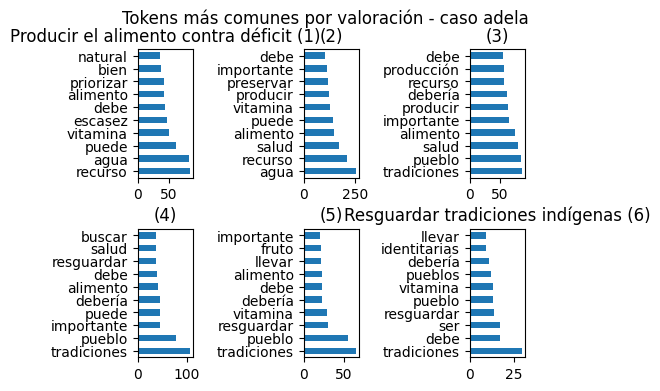

In [18]:
fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(wspace=2, hspace=0.4)

plot_token_frequency(toks_1,'Producir el alimento contra déficit (1)',ax=axs[0,0])
plot_token_frequency(toks_2,'(2)',ax=axs[0,1])
plot_token_frequency(toks_3,'(3)',ax=axs[0,2])
plot_token_frequency(toks_4,'(4)',ax=axs[1,0])
plot_token_frequency(toks_5,'(5)',ax=axs[1,1])
plot_token_frequency(toks_6,'Resguardar tradiciones indígenas (6)',ax=axs[1,2])
fig.suptitle("Tokens más comunes por valoración - caso {}".format(caso));

In [19]:
lengths_1 = comment_length(df[df['sel'] == 1],'comment',ignore=stopwords.words('spanish'))
lengths_2 = comment_length(df[df['sel'] == 2],'comment',ignore=stopwords.words('spanish'))
lengths_3 = comment_length(df[df['sel'] == 3],'comment',ignore=stopwords.words('spanish'))
lengths_4 = comment_length(df[df['sel'] == 4],'comment',ignore=stopwords.words('spanish'))
lengths_5 = comment_length(df[df['sel'] == 5],'comment',ignore=stopwords.words('spanish'))
lengths_6 = comment_length(df[df['sel'] == 6],'comment',ignore=stopwords.words('spanish'))

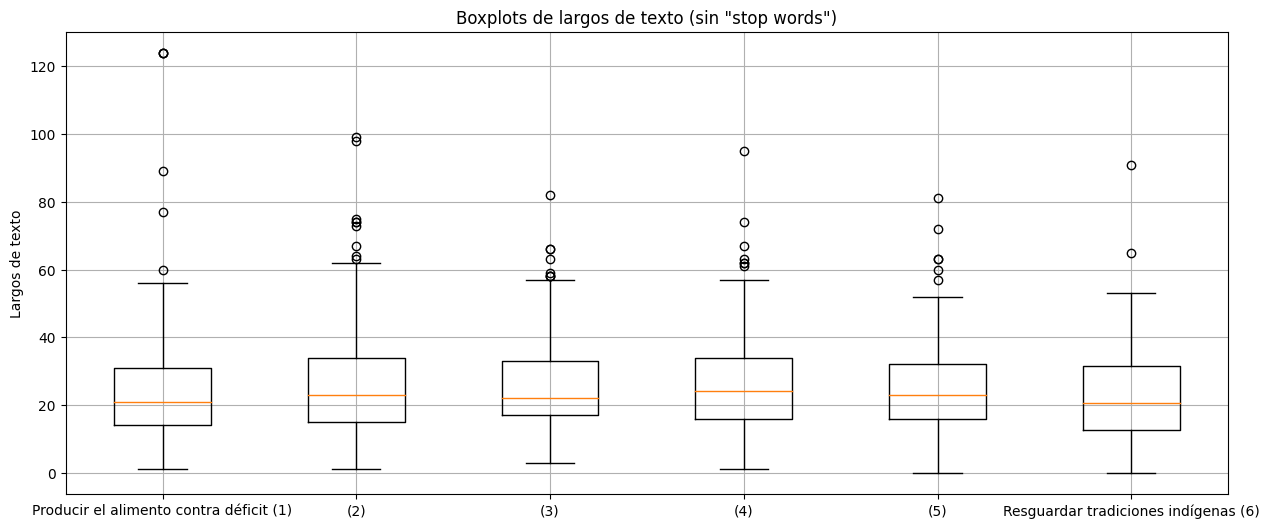

In [20]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
ax.boxplot([lengths_1, lengths_2, lengths_3, lengths_4, lengths_5, lengths_6])
ax.set_ylabel('Largos de texto')
ax.set_xticklabels(['Producir el alimento contra déficit (1)', '(2)', '(3)', '(4)', '(5)', 'Resguardar tradiciones indígenas (6)'])
ax.set_title('Boxplots de largos de texto (sin "stop words")')
plt.grid()
plt.show()

In [21]:
from utils.exploracion import print_table_md

dic = basic_stats(lengths_1)

# headers = ['valoración'] + list(dic.keys())
headers = ['valoración', 'media', 'mediana', 'desviación estándar', 'mínimo', 'máximo']
data = [['(1)'] + list(dic.values())]
data.append(['(2)'] + list(basic_stats(lengths_2).values()))
data.append(['(3)'] + list(basic_stats(lengths_3).values()))
data.append(['(4)'] + list(basic_stats(lengths_4).values()))
data.append(['(5)'] + list(basic_stats(lengths_5).values()))
data.append(['(6)'] + list(basic_stats(lengths_6).values()))

print_table_md(headers, data)

| valoración | media | mediana | desviación estándar | mínimo | máximo |
| --- | --- | --- | --- | --- | --- |
| (1) | 24.95108695652174 | 21.0 | 18.491854814233736 | 1 | 124 |
| (2) | 25.546875 | 23.0 | 14.518097206052003 | 1 | 99 |
| (3) | 25.51502145922747 | 22.0 | 13.57417982961585 | 3 | 82 |
| (4) | 26.35632183908046 | 24.0 | 14.556648764490452 | 1 | 95 |
| (5) | 25.798076923076923 | 23.0 | 15.13171644115833 | 0 | 81 |
| (6) | 23.75 | 20.5 | 17.058888645459348 | 0 | 91 |


---

### Condicionamiento por fases

In [22]:
df['phase'].value_counts()

2    229
3    217
1    203
4    192
5    180
6    180
7     50
Name: phase, dtype: int64